In [2]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

project_id = 'crazy-coffee-jam'

from google.cloud import bigquery

# Initialize the BigQuery client
client = bigquery.Client(project=project_id)

In [3]:
version = '1.0.18'
start_date = '2025-06-01'
level_end = 100
end_date = ''

In [4]:
query = f""" 
WITH start_users AS (
  SELECT 
    level, 
    COUNT(DISTINCT user_pseudo_id) as start_user
  FROM `crazy-coffee-jam.flatten_table.start_level`
  WHERE event_date >= '{start_date}'
    AND version = '{version}'
    AND level <= {level_end}
  GROUP BY level
),
win_stats AS (
  SELECT
    level,
    COUNT(DISTINCT user_pseudo_id) as win_user,
    SUM(COALESCE(revive,0)) as num_revive,
    SUM(COALESCE(booster_use,0)) as num_booster,
    AVG(count_sec) as avg_time_play_win,
    STDDEV(count_sec) as std_time_play_win,
    MAX(count_sec) as max_time_play_win,
    MIN(count_sec) as min_time_play_win,

    COUNT(DISTINCT CASE WHEN revive = 0 THEN user_pseudo_id END) as num_user_not_revive,
    AVG(CASE WHEN revive = 0 THEN count_sec END) as avg_time_win_not_revive,
    STDDEV(CASE WHEN revive = 0 THEN count_sec END) AS std_time_win_not_revive,
    MAX(CASE WHEN revive = 0 THEN count_sec END) AS max_time_win_not_revive,
    MIN(CASE WHEN revive = 0 THEN count_sec END) AS min_time_win_not_revive,

    COUNT(DISTINCT CASE WHEN booster_use = 0 THEN user_pseudo_id END) as num_user_not_booster,
    AVG(CASE WHEN booster_use = 0 THEN count_sec END) as avg_time_win_not_booster,
    STDDEV(CASE WHEN booster_use = 0 THEN count_sec END) AS std_time_win_not_booster,
    MAX(CASE WHEN booster_use = 0 THEN count_sec END) AS max_time_win_not_booster,
    MIN(CASE WHEN booster_use = 0 THEN count_sec END) AS min_time_win_not_booster,

    COUNT(DISTINCT CASE WHEN booster_use = 0 and revive = 0 THEN user_pseudo_id END) as num_user_not_resource,
    AVG(CASE WHEN booster_use = 0 and revive = 0 THEN count_sec END) as avg_time_win_not_resource,
    STDDEV(CASE WHEN booster_use = 0 and revive = 0 THEN count_sec END) AS std_time_win_not_resource,
    MAX(CASE WHEN booster_use = 0 and revive = 0 THEN count_sec END) AS max_time_win_not_resource,
    MIN(CASE WHEN booster_use = 0 and revive = 0 THEN count_sec END) AS min_time_win_not_resource,


    COUNT(DISTINCT CASE WHEN revive > 0 and booster_use = 0 THEN user_pseudo_id END) as num_user_revive,
    AVG(CASE WHEN revive > 0 and booster_use = 0 THEN count_sec END) as avg_time_win_revive,
    STDDEV(CASE WHEN revive > 0 and booster_use = 0 THEN count_sec END) AS std_time_win_revive,
    MAX(CASE WHEN revive > 0 and booster_use = 0 THEN count_sec END) AS max_time_win_revive,
    MIN(CASE WHEN revive > 0 and booster_use = 0 THEN count_sec END) AS min_time_win_revive,

    COUNT(DISTINCT  CASE WHEN booster_use > 0 and revive = 0 THEN user_pseudo_id END) as num_user_booster,
    AVG(CASE WHEN booster_use > 0 and revive = 0 THEN count_sec END) as avg_time_win_booster,
    STDDEV(CASE WHEN booster_use > 0 and revive = 0 THEN count_sec END) AS std_time_win_booster,
    MAX(CASE WHEN booster_use > 0 and revive = 0 THEN count_sec END) AS max_time_win_booster,
    MIN(CASE WHEN booster_use > 0 and revive = 0 THEN count_sec END) AS min_time_win_booster,

    COUNT(DISTINCT CASE WHEN booster_use > 0 and revive > 0 THEN user_pseudo_id END) as num_user_booster_revive,
    AVG(CASE WHEN booster_use > 0 and revive > 0 THEN count_sec END) as avg_time_win_booster_revive,
    STDDEV(CASE WHEN booster_use > 0 and revive > 0 THEN count_sec END) AS std_time_win_booster_revive,
    MAX(CASE WHEN booster_use > 0 and revive > 0 THEN count_sec END) AS max_time_win_booster_revive,
    MIN(CASE WHEN booster_use > 0 and revive > 0 THEN count_sec END) AS min_time_win_booster_revive,


    COUNT(DISTINCT CASE WHEN win_at_attempt = 1 THEN user_pseudo_id END) as num_win_user_att1,
    AVG(CASE WHEN win_at_attempt = 1 THEN count_sec END) AS avg_time_play_att1,
    STDDEV(CASE WHEN win_at_attempt = 1 THEN count_sec END) AS std_time_play_att1,
    MAX(CASE WHEN win_at_attempt = 1 THEN count_sec END) AS max_time_play_att1,
    MIN(CASE WHEN win_at_attempt = 1 THEN count_sec END) AS min_time_play_att1,

    COUNT(DISTINCT CASE WHEN win_at_attempt = 2 THEN user_pseudo_id END) as num_win_user_att2,
    AVG(CASE WHEN win_at_attempt = 2 THEN count_sec END) AS avg_time_play_att2,
    STDDEV(CASE WHEN win_at_attempt = 2 THEN count_sec END) AS std_time_play_att2,
    MAX(CASE WHEN win_at_attempt = 2 THEN count_sec END) AS max_time_play_att2,
    MIN(CASE WHEN win_at_attempt = 2 THEN count_sec END) AS min_time_play_att2,

    COUNT(DISTINCT CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use = 0 THEN user_pseudo_id END) as num_win_user_att1_revive,
    AVG(CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use = 0 THEN count_sec END) AS avg_time_play_att1_revive,
    STDDEV(CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use = 0 THEN count_sec END) AS std_time_play_att1_revive,
    MAX(CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use = 0 THEN count_sec END) AS max_time_play_att1_revive,
    MIN(CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use = 0 THEN count_sec END) AS min_time_play_att1_revive,

    COUNT(DISTINCT CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use = 0 THEN user_pseudo_id END) as num_win_user_att2_revive,
    AVG(CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use = 0 THEN count_sec END) AS avg_time_play_att2_revive,
    STDDEV(CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use = 0 THEN count_sec END) AS std_time_play_att2_revive,
    MAX(CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use = 0 THEN count_sec END) AS max_time_play_att2_revive,
    MIN(CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use = 0 THEN count_sec END) AS min_time_play_att2_revive,

    COUNT(DISTINCT CASE WHEN win_at_attempt = 1 and revive = 0 and booster_use > 0 THEN user_pseudo_id END) as num_win_user_att1_booster,
    AVG(CASE WHEN win_at_attempt = 1 and revive = 0 and booster_use > 0 THEN count_sec END) AS avg_time_play_att1_booster,
    STDDEV(CASE WHEN win_at_attempt = 1 and revive = 0 and booster_use > 0 THEN count_sec END) AS std_time_play_att1_booster,
    MAX(CASE WHEN win_at_attempt = 1 and revive = 0 and booster_use > 0 THEN count_sec END) AS max_time_play_att1_booster,
    MIN(CASE WHEN win_at_attempt = 1 and revive = 0 and booster_use > 0 THEN count_sec END) AS min_time_play_att1_booster,

    COUNT(DISTINCT CASE WHEN win_at_attempt = 2 and revive = 0 and booster_use > 0 THEN user_pseudo_id END) as num_win_user_att2_booster,
    AVG(CASE WHEN win_at_attempt = 2 and revive = 0 and booster_use > 0 THEN count_sec END) AS avg_time_play_att2_booster,
    STDDEV(CASE WHEN win_at_attempt = 2 and revive = 0 and booster_use > 0 THEN count_sec END) AS std_time_play_att2_booster,
    MAX(CASE WHEN win_at_attempt = 2 and revive = 0 and booster_use > 0 THEN count_sec END) AS max_time_play_att2_booster,
    MIN(CASE WHEN win_at_attempt = 2 and revive = 0 and booster_use > 0 THEN count_sec END) AS min_time_play_att2_booster,

    COUNT(DISTINCT CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use > 0 THEN user_pseudo_id END) as num_win_user_att1_revive_booster,
    AVG(CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use > 0 THEN count_sec END) AS avg_time_play_att1_revive_booster,
    STDDEV(CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use > 0 THEN count_sec END) AS std_time_play_att1_revive_booster,
    MAX(CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use > 0 THEN count_sec END) AS max_time_play_att1_revive_booster,
    MIN(CASE WHEN win_at_attempt = 1 and revive > 0 and booster_use > 0 THEN count_sec END) AS min_time_play_att1_revive_booster,

    COUNT(DISTINCT CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use > 0 THEN user_pseudo_id END) as num_win_user_att2_revive_booster,
    AVG(CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use > 0 THEN count_sec END) AS avg_time_play_att2_revive_booster,
    STDDEV(CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use > 0 THEN count_sec END) AS std_time_play_att2_revive_booster,
    MAX(CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use > 0 THEN count_sec END) AS max_time_play_att2_revive_booster,
    MIN(CASE WHEN win_at_attempt = 2 and revive > 0 and booster_use > 0 THEN count_sec END) AS min_time_play_att2_revive_booster

  FROM `crazy-coffee-jam.dashboard_table.win_level_time_attemp`
  WHERE event_date >= '{start_date}'
    AND version = '{version}'
    AND level <= {level_end}
  GROUP BY level
)

SELECT
  s.level,
  s.start_user,
  w.win_user,
  COALESCE(w.num_booster,0) as num_booster,
  COALESCE(w.num_revive,0) as num_revive,
  COALESCE(w.avg_time_play_win,0) as avg_time_play_win,
  COALESCE(w.std_time_play_win,0) as std_time_play_win,
  COALESCE(w.max_time_play_win,0) as max_time_play_win,
  COALESCE(w.min_time_play_win,0) as min_time_play_win,

  COALESCE(w.num_user_not_revive,0) as num_user_not_revive,
  COALESCE(w.avg_time_win_not_revive,0) as avg_time_win_not_revive,
  COALESCE(w.std_time_win_not_revive,0) as std_time_win_not_revive,
  COALESCE(w.max_time_win_not_revive,0) as max_time_win_not_revive,
  COALESCE(w.min_time_win_not_revive,0) as min_time_win_not_revive,

  COALESCE(w.num_user_not_booster,0) as num_user_not_booster,
  COALESCE(w.avg_time_win_not_booster,0) as avg_time_win_not_booster,
  COALESCE(w.std_time_win_not_booster,0) as std_time_win_not_booster,
  COALESCE(w.max_time_win_not_booster,0) as max_time_win_not_booster,
  COALESCE(w.min_time_win_not_booster,0) as min_time_win_not_booster,

  COALESCE(w.num_user_not_resource,0) as num_user_not_resource,
  COALESCE(w.avg_time_win_not_resource,0) as avg_time_win_not_resource,
  COALESCE(w.std_time_win_not_resource,0) as std_time_win_not_resource,
  COALESCE(w.max_time_win_not_resource,0) as max_time_win_not_resource,
  COALESCE(w.min_time_win_not_resource,0) as min_time_win_not_resource,

  COALESCE(w.num_user_revive,0) as num_user_revive,
  COALESCE(w.avg_time_win_revive,0) as avg_time_win_revive,
  COALESCE(w.std_time_win_revive,0) as std_time_win_revive,
  COALESCE(w.max_time_win_revive,0) as max_time_win_revive,
  COALESCE(w.min_time_win_revive,0) as min_time_win_revive,

  COALESCE(w.num_user_booster,0) as num_user_booster,
  COALESCE(w.avg_time_win_booster,0) as avg_time_win_booster,
  COALESCE(w.std_time_win_booster,0) as std_time_win_booster,
  COALESCE(w.max_time_win_booster,0) as max_time_win_booster,
  COALESCE(w.min_time_win_booster,0) as min_time_win_booster,

  COALESCE(w.num_user_booster_revive,0) as num_user_booster_revive,
  COALESCE(w.avg_time_win_booster_revive,0) as avg_time_win_booster_revive,
  COALESCE(w.std_time_win_booster_revive,0) as std_time_win_booster_revive,
  COALESCE(w.max_time_win_booster_revive,0) as max_time_win_booster_revive,
  COALESCE(w.min_time_win_booster_revive,0) as min_time_win_booster_revive,

  COALESCE(w.num_win_user_att1,0) as num_win_user_att1,
  COALESCE(w.avg_time_play_att1,0) as avg_time_play_att1,
  COALESCE(w.std_time_play_att1,0) as std_time_play_att1,
  COALESCE(w.max_time_play_att1,0) as max_time_play_att1,
  COALESCE(w.min_time_play_att1,0) as min_time_play_att1,

  COALESCE(w.num_win_user_att2,0) as num_win_user_att2,
  COALESCE(w.avg_time_play_att2,0) as avg_time_play_att2,
  COALESCE(w.std_time_play_att2,0) as std_time_play_att2,
  COALESCE(w.max_time_play_att2,0) as max_time_play_att2,
  COALESCE(w.min_time_play_att2,0) as min_time_play_att2,

  COALESCE(w.num_win_user_att1_revive,0) as num_win_user_att1_revive,
  COALESCE(w.avg_time_play_att1_revive,0) as avg_time_play_att1_revive,
  COALESCE(w.std_time_play_att1_revive,0) as std_time_play_att1_revive,
  COALESCE(w.max_time_play_att1_revive,0) as max_time_play_att1_revive,
  COALESCE(w.min_time_play_att1_revive,0) as min_time_play_att1_revive,

  COALESCE(w.num_win_user_att2_revive,0) as num_win_user_att2_revive,
  COALESCE(w.avg_time_play_att2_revive,0) as avg_time_play_att2_revive,
  COALESCE(w.std_time_play_att2_revive,0) as std_time_play_att2_revive,
  COALESCE(w.max_time_play_att2_revive,0) as max_time_play_att2_revive,
  COALESCE(w.min_time_play_att2_revive,0) as min_time_play_att2_revive,

  COALESCE(w.num_win_user_att1_booster,0) as num_win_user_att1_booster,
  COALESCE(w.avg_time_play_att1_booster,0) as avg_time_play_att1_booster,
  COALESCE(w.std_time_play_att1_booster,0) as std_time_play_att1_booster,
  COALESCE(w.max_time_play_att1_booster,0) as max_time_play_att1_booster,
  COALESCE(w.min_time_play_att1_booster,0) as min_time_play_att1_booster,

  COALESCE(w.num_win_user_att2_booster,0) as num_win_user_att2_booster,
  COALESCE(w.avg_time_play_att2_booster,0) as avg_time_play_att2_booster,
  COALESCE(w.std_time_play_att2_booster,0) as std_time_play_att2_booster,
  COALESCE(w.max_time_play_att2_booster,0) as max_time_play_att2_booster,
  COALESCE(w.min_time_play_att2_booster,0) as min_time_play_att2_booster, 

  COALESCE(w.num_win_user_att1_revive_booster,0) as num_win_user_att1_revive_booster,
  COALESCE(w.avg_time_play_att1_revive_booster,0) as avg_time_play_att1_revive_booster,
  COALESCE(w.std_time_play_att1_revive_booster,0) as std_time_play_att1_revive_booster,
  COALESCE(w.max_time_play_att1_revive_booster,0) as max_time_play_att1_revive_booster,
  COALESCE(w.min_time_play_att1_revive_booster,0) as min_time_play_att1_revive_booster,

  COALESCE(w.num_win_user_att2_revive_booster,0) as num_win_user_att2_revive_booster,
  COALESCE(w.avg_time_play_att2_revive_booster,0) as avg_time_play_att2_revive_booster,
  COALESCE(w.std_time_play_att2_revive_booster,0) as std_time_play_att2_revive_booster,
  COALESCE(w.max_time_play_att2_revive_booster,0) as max_time_play_att2_revive_booster,
  COALESCE(w.min_time_play_att2_revive_booster,0) as min_time_play_att2_revive_booster
FROM start_users s
LEFT JOIN win_stats w ON s.level = w.level
ORDER BY s.level;

"""

df = client.query(query).to_dataframe()

c:\Users\dungv\Downloads\Adone_Trainning\Crazy Coffee\.venv\Lib\site-packages\google\cloud\bigquery\table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [5]:
import pandas as pd

# Giả sử bạn đã có DataFrame df với số dòng tương ứng (ví dụ: df có 100 level)
time_values = [
    3000, 300, 300, 300, 300, 240, 180, 180, 180, 180, 180, 180, 180, 180, 210,
    150, 300, 180, 150, 180, 100, 90, 120, 180, 150, 120, 90, 140, 150, 240,
    240, 210, 180, 180, 180, 120, 150, 150, 170, 130, 120, 180, 150, 120, 100,
    120, 100, 140, 120, 240, 180, 150, 140, 150, 160, 120, 150, 110, 150, 120,
    120, 180, 90, 140, 130, 180, 150, 90, 100, 180, 100, 60, 150, 120, 130, 120,
    140, 120, 100, 180, 180, 90, 90, 180, 160, 90, 100, 130, 150, 150, 70, 100,
    100, 120, 180, 100, 100, 140, 120, 90
]

# Thêm cột vào DataFrame
df['time_default'] = time_values


In [6]:
df_general = df[['level','time_default','start_user', 'win_user','num_revive','num_booster', 'avg_time_play_win','std_time_play_win', 'max_time_play_win','min_time_play_win','num_user_revive','num_user_booster', 'num_user_not_revive','num_user_not_booster','num_user_not_resource',]]
df_not_revive = df[['level','time_default','start_user', 'win_user','num_user_not_revive', 'avg_time_win_not_revive','std_time_win_not_revive', 'max_time_win_not_revive','min_time_win_not_revive']]
df_not_booster = df[['level','time_default','start_user', 'win_user','num_user_not_booster', 'num_user_not_booster','avg_time_win_not_booster', 'std_time_win_not_booster','max_time_win_not_booster', 'min_time_win_not_booster']]
df_not_resource = df[['level','time_default','start_user', 'win_user','num_user_not_resource', 'avg_time_win_not_resource','std_time_win_not_resource', 'max_time_win_not_resource','min_time_win_not_resource']]
df_reive = df[['level','time_default','start_user', 'win_user','num_user_revive','avg_time_win_revive', 'std_time_win_revive', 'max_time_win_revive', 'min_time_win_revive']]
df_booster = df[['level','time_default','start_user', 'win_user','num_user_booster','avg_time_win_booster', 'std_time_win_booster','max_time_win_booster', 'min_time_win_booster']]
df_booster_revive = df[['level','time_default','start_user', 'win_user', 'num_user_booster_revive', 'avg_time_win_booster_revive','std_time_win_booster_revive', 'max_time_win_booster_revive','min_time_win_booster_revive']]
df_att1 = df[['level','time_default','start_user', 'win_user','num_win_user_att1','avg_time_play_att1', 'std_time_play_att1', 'max_time_play_att1','min_time_play_att1']]
df_att2 = df[['level','time_default','start_user', 'win_user','num_win_user_att2', 'avg_time_play_att2','std_time_play_att2', 'max_time_play_att2', 'min_time_play_att2',]]
df_att1_revive = df[['level','time_default','start_user', 'win_user', 'num_win_user_att1_revive', 'avg_time_play_att1_revive','std_time_play_att1_revive', 'max_time_play_att1_revive','min_time_play_att1_revive']]
df_att2_revive = df[['level','time_default','start_user', 'win_user','num_win_user_att2_revive','avg_time_play_att2_revive', 'std_time_play_att2_revive','max_time_play_att2_revive', 'min_time_play_att2_revive']]
df_att1_booster = df[['level','time_default','start_user', 'win_user','num_win_user_att1_booster', 'avg_time_play_att1_booster','std_time_play_att1_booster', 'max_time_play_att1_booster','min_time_play_att1_booster']]
df_att2_booster = df[['level','time_default','start_user', 'win_user','num_win_user_att2_booster', 'avg_time_play_att2_booster','std_time_play_att2_booster', 'max_time_play_att2_booster','min_time_play_att2_booster']]
df_att1_revive_booster = df[['level','time_default','start_user', 'win_user', 'num_win_user_att1_revive_booster', 'avg_time_play_att1_revive_booster','std_time_play_att1_revive_booster','max_time_play_att1_revive_booster','min_time_play_att1_revive_booster' ]]
df_att2_revive_booster = df[['level','time_default','start_user', 'win_user','num_win_user_att2_revive_booster','avg_time_play_att2_revive_booster','std_time_play_att2_revive_booster','max_time_play_att2_revive_booster','min_time_play_att2_revive_booster']]

In [7]:
df_general['win_rate'] = df_general['win_user'] / df_general['start_user']
df_general['revive_user_rate'] = df_general['num_user_revive'] / df_general['start_user']
df_general['booster_user_rate'] = df_general['num_user_booster'] / df_general['start_user']

C:\Users\dungv\AppData\Local\Temp\ipykernel_19732\65965543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general['win_rate'] = df_general['win_user'] / df_general['start_user']
C:\Users\dungv\AppData\Local\Temp\ipykernel_19732\65965543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general['revive_user_rate'] = df_general['num_user_revive'] / df_general['start_user']
C:\Users\dungv\AppData\Local\Temp\ipykernel_19732\65965543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

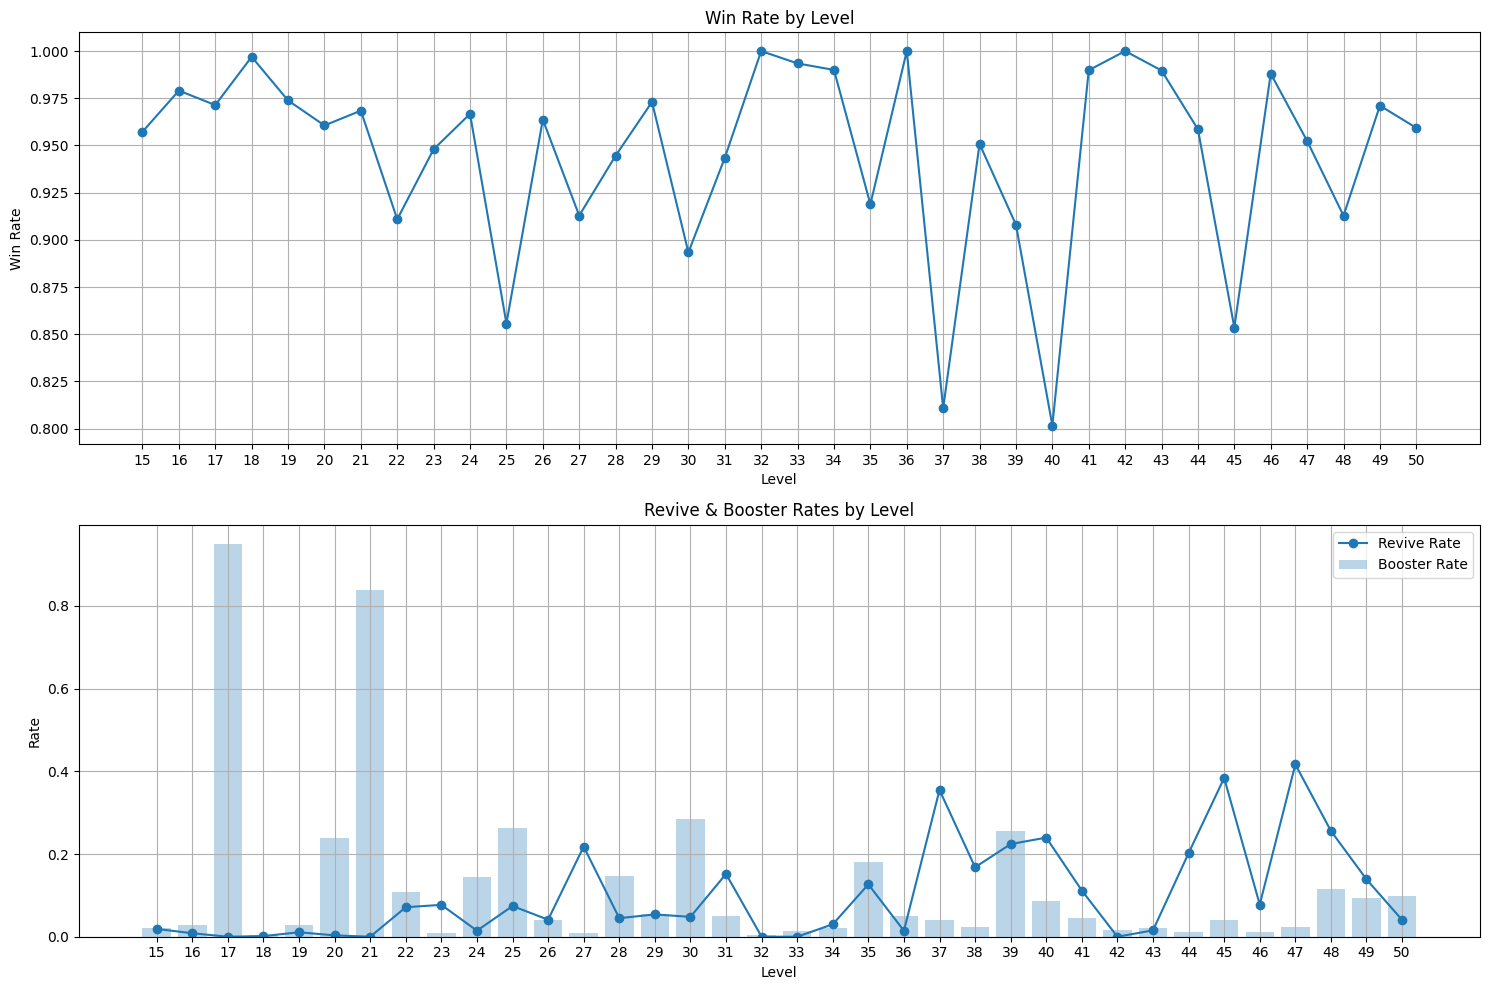

In [8]:
import matplotlib.pyplot as plt

# Filter data for levels 15-50
df_filtered = df_general[(df_general['level'] >= 15) & (df_general['level'] <= 50)]

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot win rate line chart
ax1.plot(df_filtered['level'], df_filtered['win_rate'], marker='o')
ax1.set_title('Win Rate by Level')
ax1.set_xlabel('Level')
ax1.set_ylabel('Win Rate')
ax1.grid(True)
ax1.set_xticks(df_filtered['level'])

# Plot revive and booster rates
ax2.plot(df_filtered['level'], df_filtered['revive_user_rate'], marker='o', label='Revive Rate')
ax2.bar(df_filtered['level'], df_filtered['booster_user_rate'], alpha=0.3, label='Booster Rate')
ax2.set_title('Revive & Booster Rates by Level')
ax2.set_xlabel('Level')
ax2.set_ylabel('Rate')
ax2.grid(True)
ax2.legend()
ax2.set_xticks(df_filtered['level'])

plt.tight_layout()
plt.show()

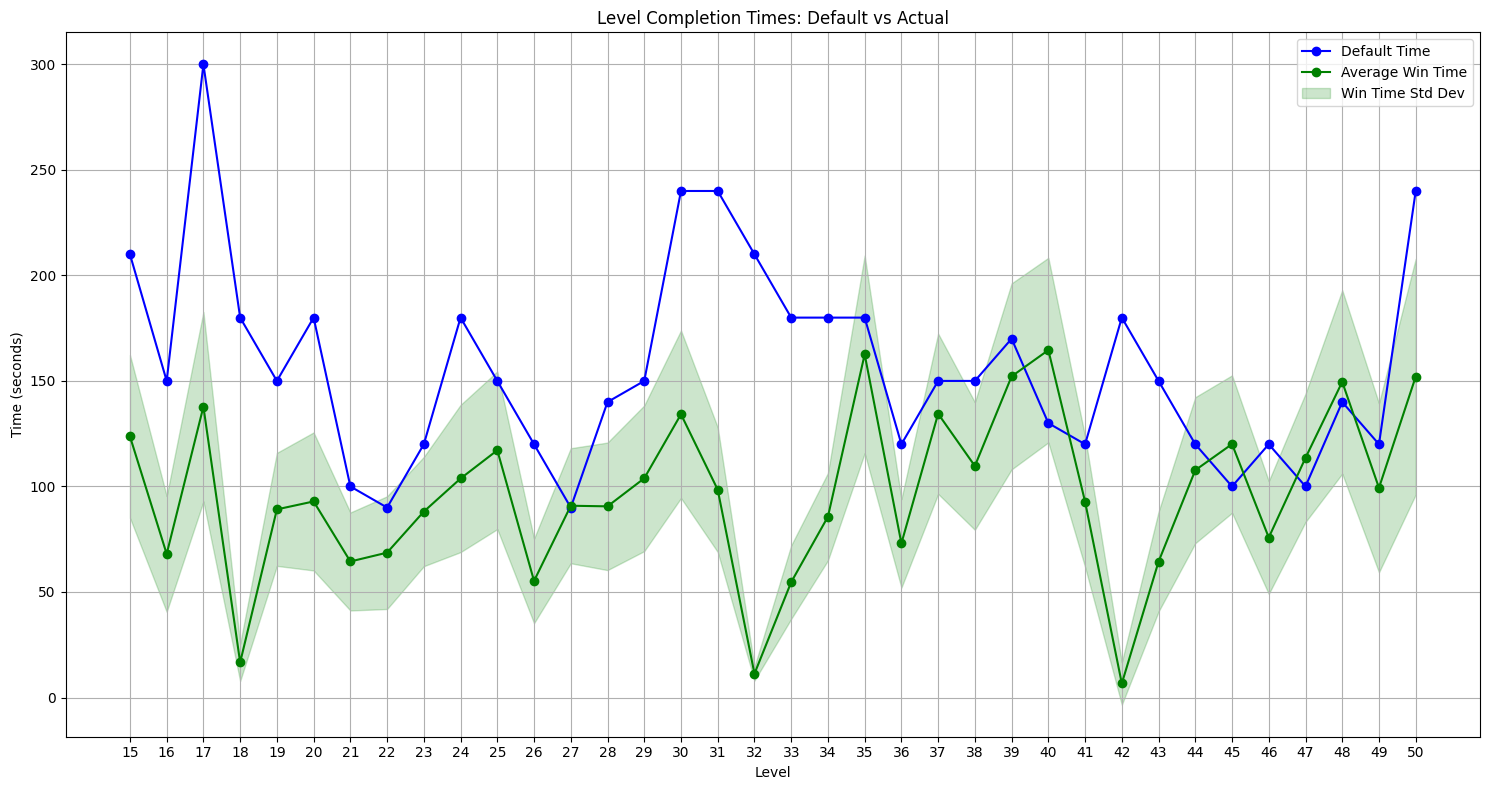

In [9]:
# Plot time comparison
plt.figure(figsize=(15, 8))

# Plot default time line
plt.plot(df_filtered['level'], df_filtered['time_default'], marker='o', label='Default Time', color='blue')

# Plot average win time with standard deviation band
plt.plot(df_filtered['level'], df_filtered['avg_time_play_win'], marker='o', label='Average Win Time', color='green')
plt.fill_between(df_filtered['level'], 
                 df_filtered['avg_time_play_win'] - df_filtered['std_time_play_win'],
                 df_filtered['avg_time_play_win'] + df_filtered['std_time_play_win'], 
                 alpha=0.2, color='green', label='Win Time Std Dev')

plt.title('Level Completion Times: Default vs Actual')
plt.xlabel('Level')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.xticks(df_filtered['level'])

plt.tight_layout()
plt.show()

In [ ]:
df_general['win_rate'] = df_general['win_user'] / df_general['start_user']

In [ ]:
# Filter data for levels 15-50
df_filtered = df_general[(df_general['level'] >= 15) & (df_general['level'] <= 50)]

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot win rate
ax1.plot(df_filtered['level'], df_filtered['win_rate'], marker='o')
ax1.set_title('Win Rate by Level')
ax1.set_xlabel('Level')
ax1.set_ylabel('Win Rate')
ax1.grid(True)
ax1.set_xticks(df_filtered['level'])

# Plot time comparison
ax2.plot(df_filtered['level'], df_filtered['time_default'], marker='o', label='Default Time', color='blue')
ax2.plot(df_filtered['level'], df_filtered['avg_time_win_not_revive'], marker='o', label='Average Win Time (No Revive)', color='green')
ax2.fill_between(df_filtered['level'],
                 df_filtered['avg_time_win_not_revive'] - df_filtered['std_time_win_not_revive'],
                 df_filtered['avg_time_win_not_revive'] + df_filtered['std_time_win_not_revive'],
                 alpha=0.2, color='green', label='Win Time Std Dev')
ax2.set_title('Level Completion Times: Default vs No Revive')
ax2.set_xlabel('Level') 
ax2.set_ylabel('Time (seconds)')
ax2.grid(True)
ax2.legend()
ax2.set_xticks(df_filtered['level'])

plt.tight_layout()
plt.show()